In [1]:
from jennas_test_modules import run_model_stochastic
import matplotlib.pyplot as plt
import numpy as np
import importlib


from scipy.stats import ks_2samp
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import binom
import powerlaw

In [2]:


#set up function to fit power law distribution and other distributions
def analyze_powerlaw_distribution2(data):
    """
    Function that analysis the distribution of given data with the powerlaw package
    
    Makes use of the Kolmogorov-Smirnov test for which H0: data is .. distributed, HA: data is not .. distributed
    If H0 is rejected for the power law distribution, the function will check if the data is exponentially,bionomial,gamma or poisson distributed 
    If the function is not matched with any of these distributions, the function will return:
      "No alternative distribution fit available"


    Input: data (array-like)
    Output: string with distribution type

    """
    #Make data in array format
    data = np.asarray(data)

    #Fit to a power-law distribution
    fit = powerlaw.Fit(data, discrete=True, verbose=True)

    #Goodness of fit using the Kolmogorov-Smirnov test for power-law vs. exponential
    ks_stat_powerlaw, ks_p_value_powerlaw = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

#Check for power law distribution
    if ks_p_value_powerlaw < 0.05:
        result = "Not a power-law distribution"

        #Calculate p-values for alternative distributions
        ks_p_value_exponential = ks_2samp(data, np.random.exponential(np.mean(data), len(data)))[1]
        ks_p_value_poisson = ks_2samp(data, poisson.rvs(np.mean(data), size=len(data)))[1]
        ks_p_value_binomial = ks_2samp(data, np.random.binomial(n=int(np.mean(data)), p=0.5, size=len(data)))[1]
        ks_p_value_gamma = ks_2samp(data, gamma.rvs(np.mean(data)/2, scale=2, size=len(data)))[1]

        #Check alternative distributions, because we did 4 tests, we need to correct for multiple testing with bonferroni (0.05/4)
        if ks_p_value_exponential < 0.05/4:
            result = f" (Exponential fit p-value: {ks_p_value_exponential:.4f})"
        elif ks_p_value_poisson < 0.05/4:
            result = " (Poisson distribution)"
        elif ks_p_value_binomial < 0.05/4:
            result = " (Binomial distribution)"
        elif ks_p_value_gamma < 0.05/4:
            result = " (Gamma distribution)"
        else:
            result = " (No alternative distribution fit available)"

        return result

    else:
        result = "Power-law distribution"

    


In [3]:
p = 0.13793103448275862
L = 300
T = int(L/2)
n = 20

# NaSch parameters
p_slowdown = 0.47368421052631576
v_max = 5

# Dynamic parameters
neighbourhood_size = 3
entry_chance = 0.1
exit_chance = 0.2

lifespan_counter_nondynamic, jam_size_counter_nondynamic, evolutions_nondynamic = run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=True, dynamic_model=False, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)


lifespan_counter_dynamic, jam_size_counter_dynamic, evolutions_dynamic = run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=True, dynamic_model=True, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)



TypeError: 'int' object is not subscriptable

In [ ]:
print(analyze_powerlaw_distribution2(list(lifespan_counter_nondynamic.elements())))
print(analyze_powerlaw_distribution2(list(jam_size_counter_nondynamic.elements())))

print(analyze_powerlaw_distribution2(list(lifespan_counter_dynamic.elements())))
print(analyze_powerlaw_distribution2(list(jam_size_counter_dynamic.elements())))

Calculating best minimal value for power law fit
None progress: 96%
Calculating best minimal value for power law fit
None progress: 97%
Calculating best minimal value for power law fit
None progress: 97%
Calculating best minimal value for power law fit
None progress: 98%


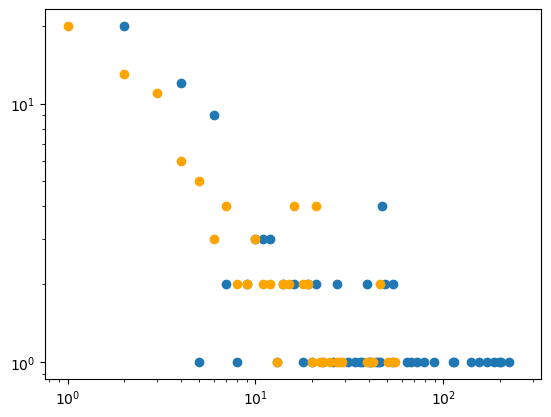

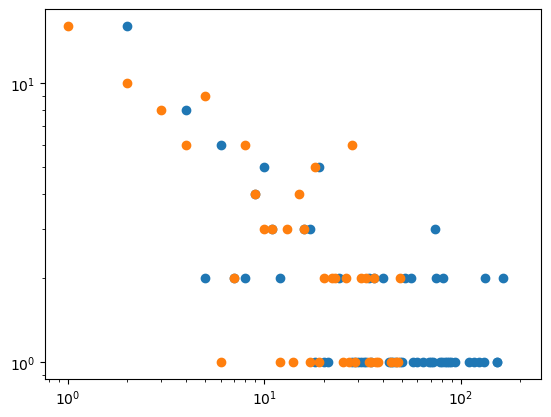

56


In [ ]:
plt.loglog(range(1, int(max(jam_size_counter_nondynamic.keys()))), [jam_size_counter_nondynamic[i] for i in range(1, int(max(jam_size_counter_nondynamic.keys())))], 'o')
plt.loglog(range(1, int(max(lifespan_counter_nondynamic.keys()))), [lifespan_counter_nondynamic[i] for i in range(1, int(max(lifespan_counter_nondynamic.keys())))], 'o', color='orange')
plt.show()

plt.clf()
plt.loglog(range(1, int(max(jam_size_counter_dynamic.keys()))), [jam_size_counter_dynamic[i] for i in range(1, int(max(jam_size_counter_dynamic.keys())))], 'o')
plt.loglog(range(1, int(max(lifespan_counter_dynamic.keys()))), [lifespan_counter_dynamic[i] for i in range(1, int(max(lifespan_counter_dynamic.keys())))], 'o')
plt.show()

print(len(range(1, int(max(lifespan_counter_dynamic.keys())))))